<h2>SymPy</h2>
This notebook shows some of SymPy's main features. Consult the official documentation at  http://docs.sympy.org/latest/index.html to obtain the whole module reference.
<p>

</p>
<p>
SymPy is a Computer Algebra System (CAS) for Python. In other words, you can perform symbolic mathematic operations with it and embed these operations into your Python programs. SymPy is part of the SciPy project. Usually, Sympy is bundled with common Python distribution, such as Anaconda (https://www.continuum.io/anaconda). If it is not bundled with your distribution and you use pip, you can install SymPy with the command "pip install sympy".
</p>
<p>
Most of the shown examples are derived from the free book "Scipy lectures" (http://www.scipy-lectures.org).
</p>
<p>
Once you have installed SymPy on your device, you can load it into your Python script:
</p>

In [1]:
# This notebook was tested with Python 3.5 and SymPy 1.0

# Only methods that are used in this notebook are imported. To import all functions, write "from sympy import *".
# Note that some methods, such as "sin", have homonymous counterparts in other packages, such as NumPy.
# If you use other packages, use "import sympy (as ...)" and "sympy." before every SymPy method to avoid conflicts.
from sympy import * #e.g. Derivative, diff, dsolve, Eq, Function, init_printing, integrate, lambdify, Matrix, sin, solve, sqrt, ...
from sympy.abc import x, y, z # Can be anything from a to z. Represents variables.
from sympy.solvers import linsolve # To solve linear equation systems.

<h3>1. Symbolic representation with SymPy</h3>
SymPy works with symbolic mathematic operations. You can store mathematic formulas in variables without the necessity to compute them directly:

In [2]:
function = sqrt(sin(x)) + 23 # "sqrt" and "sin" were imported from sympy. "x" was imported from sympy.abc.
function

sqrt(sin(x)) + 23

<h3>2. Usage in interactive sessions</h3>
In interactive sessions, like this Jupyter notebook, you can also print your expressions as more readable LATEX or Matjax expressions (depending on your device) after you initialzed this option with "init_printing()":<br>
(More information at http://docs.sympy.org/latest/tutorial/printing.html)

In [3]:
init_printing()
function

In [10]:
oo #Infinite

<h3>3. Simplify or expand mathematical expressions</h3>

In [4]:
expand((x + y)**3)

In [5]:
expand(x + y, complex=True)

In [6]:
expand(cos(x + y), trig=True)

In [7]:
simplify((x + x*y) / x)

<h3>4. Limits of functions</h3>

In [9]:
# Limit of sin(x) as x->0
limit(sin(x)/x, x, 0)

In [8]:
# Using oo (which stands for inifinte)
# Limit of x as x->oo
limit(x, x, oo)

In [11]:
limit(x**2, x, -oo)

<h3>5. Differentiation and Integration</h3>
You can perform calculus operations on your functions, such as differentiation and integration:<br>
(More information at http://docs.sympy.org/latest/tutorial/calculus.html)

In [12]:
function2 = x**2
# First derivative
function2.diff()

In [17]:
# Second derivative using alternative diff()
diff(function2, x, 2)

In [19]:
function3 = sin(x) * 2
# Integration without limits (indefinite)
integrate(function3, x)

In [22]:
# Integration with limits (definite)
integrate(function3, (x, 0, 2))

In [23]:
# Improper integration (using oo as infinite)
integrate(exp(-x**2), (x, -oo, oo))

<h3>5. Series expansion</h3>
You can find about the series module at http://docs.sympy.org/latest/modules/series/index.html

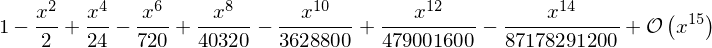

In [43]:
# Get the Taylor series at 0 until x^15...
series(cos(x), x, 0, 15)

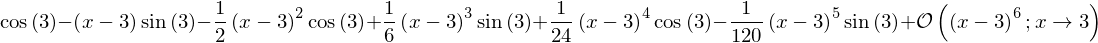

In [42]:
# ...or at 3 until the error is automatically assumed as small enough
series(cos(x), x, 3)

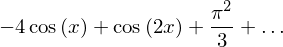

In [45]:
# Get the Fourier series from -Pi to +Pi
s = fourier_series(x**2, (x, -pi, pi))
s

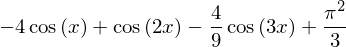

In [50]:
# Returns the 4 first elements of the fourier series
s.truncate(n=4)

<h3>6. Defining and solving equations/inequalities</h3>
Aside of defining functions, you can also define liner and non-linear equations (with "Eq()") and solve them:<br>
(More information at http://docs.sympy.org/latest/modules/solvers/solvers.html)

In [6]:
equation = Eq(x**2, 4)
solve(equation)

You can access the left hand side and the right hand side of the equation with the following attributes:

In [7]:
equation.lhs

In [8]:
equation.rhs

SymPy can also solve inequalities,...

In [9]:
inequality = x**2 < 10
solve(inequality)

...linear equation systems...

In [10]:
# Solves the following system of two equations:
# x +  y +  z -1 = 0
# x + 2y + 3z -1 = 0
# Alternative method: linsolve([x + y + z - 1, x + 2*y + 3*z - 1], (x, y, z))
linsolve(Matrix(([1, 1, 1, 1], [1, 2, 3, 1])), (x, y, z))

...and overdetermined systems

In [29]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f1 = 3 * x1**2 - 2 * x2**2 - 1
f2 = x1**2 - 2 * x1 + x2**2 + 2 * x2 - 8
print(nsolve((f1, f2), (x1, x2), (-1, 1)))

Matrix([[-1.19287309935246], [1.27844411169911]])


<h3>7. Ordinary Differential Equations (ODE)</h3>
ODE can be solved in the following way (More information at http://docs.sympy.org/latest/modules/solvers/ode.html):

In [26]:
f = Function("f")
diff_equation = Eq(f(x).diff()/f(x), 3/x) # In other words: y'/y = 3/x
diff_result = dsolve(diff_equation, f(x))
diff_result

It is also possible to classify ODEs wth SymPy:

In [27]:
classify_ode(diff_equation, f(x))

('separable',
 '1st_exact',
 '1st_linear',
 '1st_homogeneous_coeff_best',
 '1st_homogeneous_coeff_subs_indep_div_dep',
 '1st_homogeneous_coeff_subs_dep_div_indep',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 '1st_linear_Integral',
 '1st_homogeneous_coeff_subs_indep_div_dep_Integral',
 '1st_homogeneous_coeff_subs_dep_div_indep_Integral')

For Partial Differental Equations, look here: http://docs.sympy.org/latest/modules/solvers/pde.html

<h3>8. Conversion of SymPy representations into Python code</h3>
You can also convert SymPy functions to Python functions to use them directly in your programs:<br>

In [12]:
result_function = diff_result.rhs
result_function

In [13]:
python_function = lambdify(('C1', x), result_function)
python_function(1, 2) # C1=1, x=2.

If you use Cython (http://cython.org/), you can use more efficient solutions to pythonize your SymPy functions, see http://docs.sympy.org/latest/modules/numeric-computation.html for more information.

PSB 2017